In [46]:
import networkx as nx
import matplotlib.pyplot as plt
import random as rn
import numpy as np
from collections import Counter
from operator import itemgetter

In [39]:
#Solution 1
#Implemenattion ow Watt-Strogatz model

def WattStrogatz(n,p):
    G = nx.Graph()
    N = range(n)
    nodes = list(N)
    G.add_nodes_from(nodes)

    for i in range(n-2):
        G.add_edges_from([(nodes[i],nodes[i+1])]) #creating connection between all nearest neighnbours
        G.add_edges_from([(nodes[i],nodes[i+2])]) #creating connection between second neearest neihbours, e.g.: (1,3), (1,9)
    G.add_edges_from([(nodes[0],nodes[n-1])])
    G.add_edges_from([(nodes[0],nodes[n-2])])
    G.add_edges_from([(nodes[n-2],nodes[n-1])])
    G.add_edges_from([(nodes[n-1],nodes[1])])

    if p > 0:
        for k in range(n): #rewinding each existing links with p probability
            if rn.random() <= p:
                w = list(G.edges(k))
                length = len(w)
                for m in range(length):
                    n1 = k
                    n2 = rn.choice(nodes)
                    if n1 != n2 and G.get_edge_data(n1,n2) == None:
                        G.add_edge(n1,n2)
                        e = list(G.edges(n1))
                        r = rn.choice(e)
                        G.remove_edge(*r)
    return G

Number of edges:  4000
Number of nodes:  2000
Average degree:  4.0
Variance of the degree distribution:  1.0


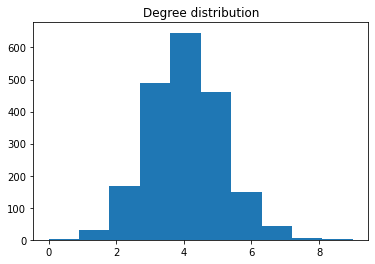

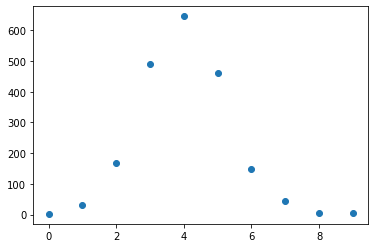

In [101]:
n = 2000
p = 0.4

G = WattStrogatz(n,p) 

#GRAPH PLOT
#plt.title(r"$p = %.2f$"%p)
#nx.draw_circular(G,with_labels=True)
#plt.savefig("C:/STUDIA, DOCS/APPLIED MATHEMATICS/SEMESTER 1/Diffusion processes on complex networks/WattStrogatz200004.png")
#plt.show()

#DATA ANALYSIS

num = G.number_of_edges()
vert = G.number_of_nodes()
aver_degree = 2*num/vert     #np.mean(G.degree())
var_de = np.var(list(G.degree())[1])
print('Number of edges: ', num)
print('Number of nodes: ', vert)
print('Average degree: ', aver_degree)
print('Variance of the degree distribution: ', var_de)

#Degree distribution
def degree_dist(g):
    degrees = [g.degree(n) for n in g.nodes()]
    plt.figure(1)
    plt.title('Degree distribution')
    plt.hist(degrees)
    plt.show()
    plt.figure(2)
    degree_counts = Counter(degrees)                                                                                                 
    x, y = zip(*degree_counts.items())
    plt.scatter(x,y)                                                                                                    
    plt.show()
    
degree_dist(G)



Number of edges:  4000
Number of edges:  2000
Average degree:  4.0
Variace of the degree distribution:  2.25


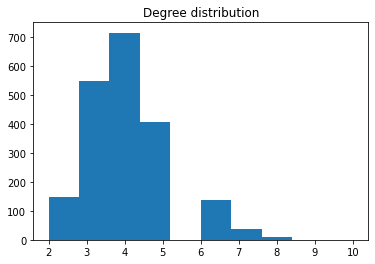

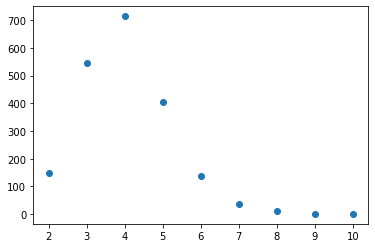

In [102]:
#Buld in function to check if implemetation is correct
ws=nx.watts_strogatz_graph(n,4,p)
numws = ws.number_of_edges()
vertws = ws.number_of_nodes()
aver_degreews = 2*numws/vertws
var_dews = np.var(list(ws.degree())[1])
print('Number of edges: ', numws)
print('Number of edges: ', vertws)
print('Average degree: ', aver_degreews)
print('Variace of the degree distribution: ', var_dews)
degree_dist(ws)
#plt.title(r"$p = %.2f$"%p)
#nx.draw_circular(ws,with_labels=True)
#plt.savefig("C:/STUDIA, DOCS/APPLIED MATHEMATICS/SEMESTER 1/Diffusion processes on complex networks/WattStrogatz_buildin200004.png")
#plt.show()

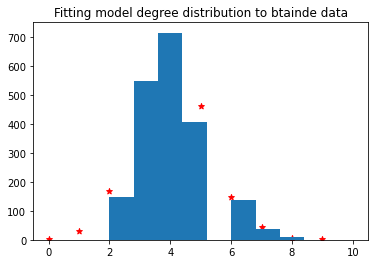

In [107]:
#FITIING MODEL DEGREE DISTRIBUTION TO OBTAINED DATA
degrees = [G.degree(n) for n in G.nodes()]
degreesws = [ws.degree(n) for n in ws.nodes()]
plt.figure(1)
plt.title('Fitting model degree distribution to btainde data')
plt.hist(degreesws) #histogram - data from build in function watts_strogotz()
degree_counts = Counter(degrees)                                                                                                 
x, y = zip(*degree_counts.items())
plt.scatter(x,y, marker='*', color="red")   #from obtainde data via implemented function                                                                                                 
plt.show()

